옵션 감마(Gamma)는 기초 자산 가격의 변화에 대한 델타의 민감도를 나타냅니다.

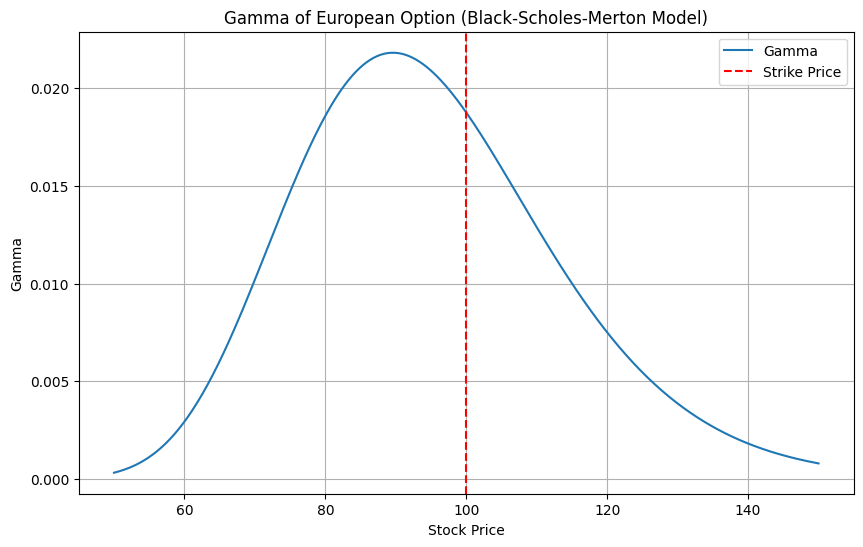

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def black_scholes_merton_gamma(S, K, T, r, sigma):
    """
    블랙-숄즈-머튼 모델을 사용하여 유럽형 옵션의 감마를 계산하는 함수

    Parameters:
    S: 현재 주식 가격
    K: 행사가격 (strike price)
    T: 옵션 만기 시간 (단위: 년)
    r: 무위험 이자율
    sigma: 주식 가격의 변동성

    Returns:
    옵션의 감마 값
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma

# 예제 파라미터
K = 100  # 행사가격
T = 1  # 만기 시간 (1년)
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성

# 주식 가격 범위 설정
S_range = np.linspace(50, 150, 400)

# 감마 값 계산
gamma_values = [black_scholes_merton_gamma(S, K, T, r, sigma) for S in S_range]

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(S_range, gamma_values, label='Gamma')
plt.axvline(x=K, color='red', linestyle='--', label='Strike Price')
plt.title('Gamma of European Option (Black-Scholes-Merton Model)')
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.legend()
plt.grid(True)
plt.show()
